# PRNN HW5-3

## Test MnistData class

In [46]:
import mnist_data

In [47]:
import numpy as np

In [48]:
import matplotlib.pyplot as plt

In [49]:
data = mnist_data.MNIST_Data()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/dataset/mnist.pkl
Dataset loaded successfully.


In [50]:
img = data.dataset['test_images']
label = data.dataset['test_labels']

In [51]:
img.shape

(10000, 784)

In [52]:
import matplotlib.pyplot as plt

In [53]:
idx = 20

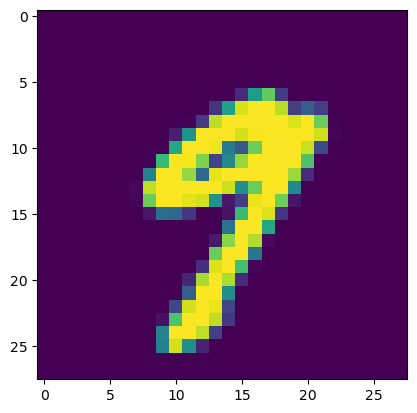

In [54]:
plt.imshow(img[idx].reshape(28,28))

In [55]:
print(f'label: {label[idx]}')

label: 9


#### Let's predict!!

In [56]:
import pickle

In [57]:
def init_network():
    with open('model/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

In [58]:
net = init_network()

In [59]:

net

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [60]:
import numpy as np
import pickle

In [61]:

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [62]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)


In [63]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y
 

In [64]:
y_hat = predict(net, img[idx])

/var/folders/tc/p09j7ll56zbbhd266ds5wqh40000gn/T/ipykernel_93635/2673531684.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [65]:
print(y_hat)
p = np.argmax(y_hat)
print(p)

[5.8675333e-08 2.5420188e-05 1.6675299e-08 1.4469649e-04 3.5920404e-04
 4.2456694e-04 6.1695724e-09 8.9064967e-03 2.8191425e-04 9.8985767e-01]
9


In [66]:
import numpy as np
import pickle

In [67]:
class Mnist():
    def __init__(self):
        self.data = mnist_data.MNIST_Data()
        self.params = {}


    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))


    def softmax(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a/np.sum(exp_a)
    

    def load(self):
        (x_train, y_train), (x_test, y_test) = self.data.load()
        return (x_train, y_train), (x_test, y_test)
    
    
    def init_network(self):
        with open('model/sample_weight.pkl', 'rb') as f:
            self.params = pickle.load(f)
    

    def predict(self, x):
        w1, w2, w3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.softmax(a3)

        return y    


In [68]:
mnist = Mnist()
(_, _), (test_images, test_labels) = mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/dataset/mnist.pkl
Dataset loaded successfully.


In [69]:
idx = 21
x = test_images[idx]
y = test_labels[idx]

In [70]:
y_hat = mnist.predict(x)

In [71]:
y_one_hot = np.argmax(y)
p = np.argmax(y_hat)

The image 21 is 6. The groud truth is 6.


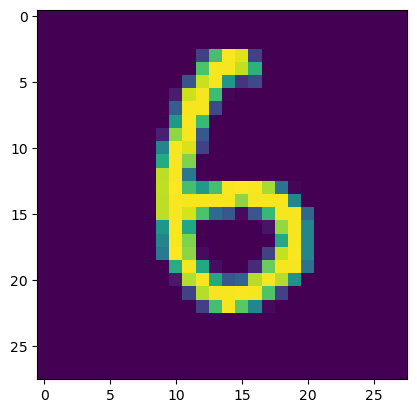

In [72]:
print(f'The image {idx} is {y_one_hot}. The groud truth is {p}.')
plt.imshow(x.reshape(28, 28))

In [73]:
import mnist

In [74]:
mnist = Mnist()
mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/dataset/mnist.pkl
Dataset loaded successfully.


### Numpy Axis

In [75]:
a = np.array( [[1, 2, 3], \
               [4, 5, 6]])

In [76]:
np.sum(a)

21

In [77]:
np.sum(a, axis=0)

array([5, 7, 9])

In [78]:
np.sum(a, axis=1)

array([ 6, 15])

### Predict with Batch

In [79]:
import mnist

mnist = Mnist()
(_, _), (test_images, test_labels) = mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/dataset/mnist.pkl
Dataset loaded successfully.


In [80]:
test_images.shape

(10000, 784)

In [81]:
batch_size = 5
x = test_images[0:10]
y = test_labels[0:10]

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_hat_batch = mnist.predict(x_batch)
    p = np.argmax(y_hat_batch, axis=1)
    print(p)

[7 2 1 0 4]
[1 4 9 6 9]


In [82]:
print(np.argmax(y, axis=1))

[7 2 1 0 4 1 4 9 5 9]


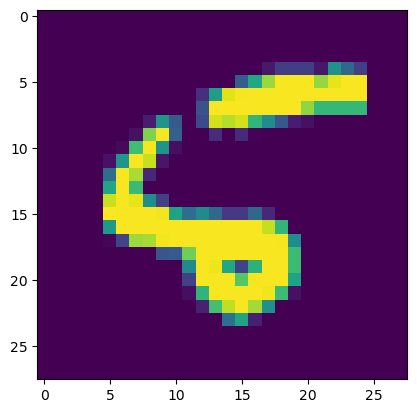

In [83]:
plt.imshow(x[8].reshape(28,28))

In [93]:
import numpy as np
import pickle
import cv2
import mnist_data
import matplotlib.pyplot as plt

In [101]:
class Mnist:
    def __init__(self):
        self.data = mnist_data.MNIST_Data()
        self.params = {}

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a / np.sum(exp_a, axis=1, keepdims=True)
    
    def load(self):
        (x_train, y_train), (x_test, y_test) = self.data.load()
        return (x_train, y_train), (x_test, y_test)
    
    def init_network(self):
        with open('/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/model/sample_weight.pkl', 'rb') as f:
            self.params = pickle.load(f)
    
    def display_image(self, image):
        """Display the processed image using matplotlib."""
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()

    def preprocess_image(self, image_path):
        print('in the preprocessing')
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        image = 1 - (image.astype('float32') / 255.0)
        image = image.flatten().reshape(1, -1)  # Flatten and add batch dimension
        return image

    def preprocess_image(self, image_path):
        """Load, preprocess, and display an image for prediction."""
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Image {image_path} not found.")
        
        # Resize to 28x28 if not already, normalize, and flatten
        if image.shape != (28, 28):
            image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
        image = 1 - (image.astype(np.float32) / 255.0)

        # Display the processed image
        self.display_image(image)
        
        return image.flatten().reshape(1, -1)  # Return flattened image for prediction
    
    def predict(self, x):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, W1) + b1
        z1 = self.sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = self.sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = self.softmax(a3)
        return y

    def predict_image(self, image_path):
        image = self.preprocess_image(image_path)
        return np.argmax(self.predict(image), axis=1)

### Initialise the model

In [102]:
# Initialize Mnist model
mnist = Mnist()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/dataset/mnist.pkl
Dataset loaded successfully.


### Preprocessing and Display the data

Processing and displaying image: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_0/0_4.png


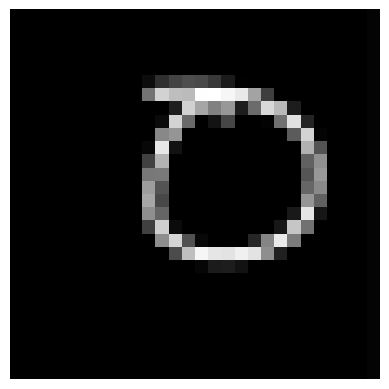

Flattened image shape: (1, 784)
Processing and displaying image: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_1/1_2.png


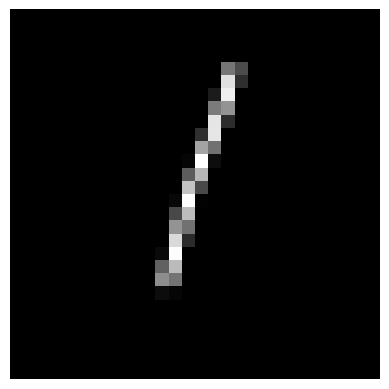

Flattened image shape: (1, 784)
Processing and displaying image: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_2/2_2.png


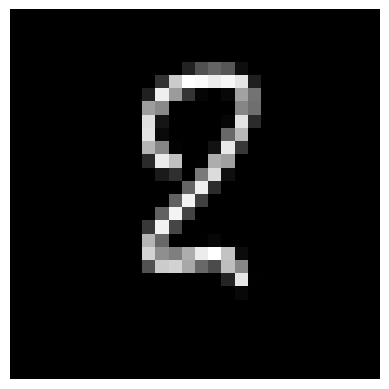

Flattened image shape: (1, 784)
Processing and displaying image: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_2/2_0.png


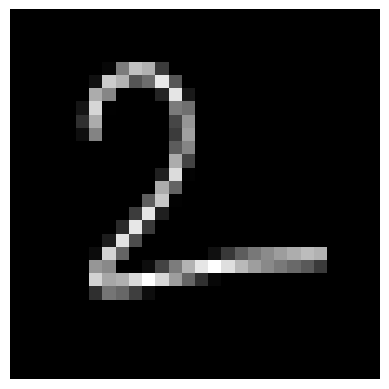

Flattened image shape: (1, 784)
Processing and displaying image: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_3/3_4.png


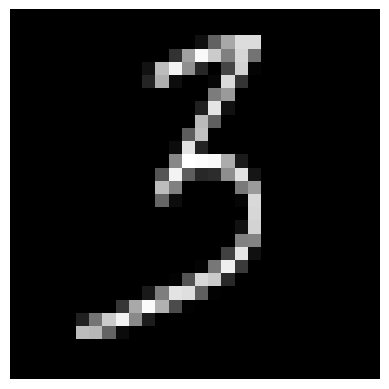

Flattened image shape: (1, 784)


In [103]:
# Define the image paths
img_path_1 = '/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_0/0_4.png'
img_path_2 = '/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_1/1_2.png'
img_path_3 = '/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_2/2_2.png'
img_path_4 = '/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_2/2_0.png'
img_path_5 = '/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_3/3_4.png'

# List of image paths to process
image_paths = [img_path_1, img_path_2, img_path_3, img_path_4, img_path_5]

# Process and display each image
for img_path in image_paths:
    print(f"Processing and displaying image: {img_path}")
    processed_image = mnist.preprocess_image(img_path)
    # processed_image is returned in flattened form; it can be used for further processing if needed
    print("Flattened image shape:", processed_image.shape)


### Evaluate The Images

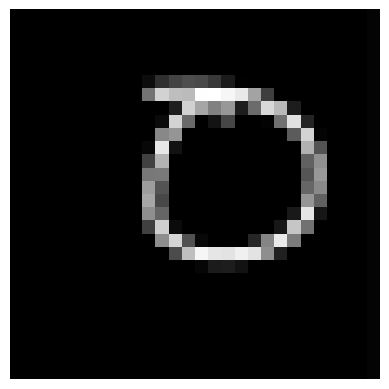

Success: Image 0_4.png is for digit 0 and is recognized as 0.


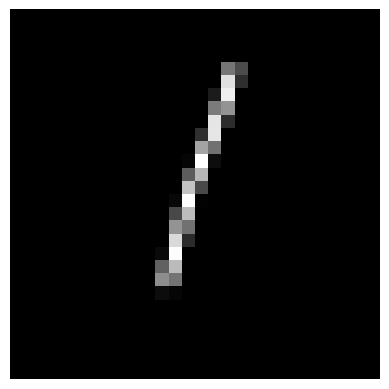

Success: Image 1_2.png is for digit 1 and is recognized as 1.


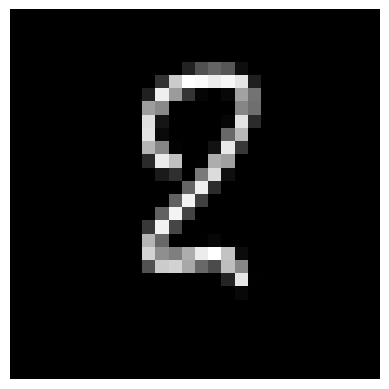

Success: Image 2_2.png is for digit 2 and is recognized as 2.


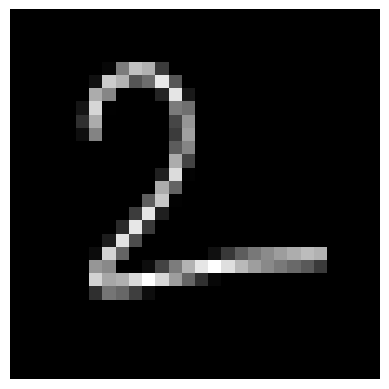

Success: Image 2_0.png is for digit 2 and is recognized as 2.


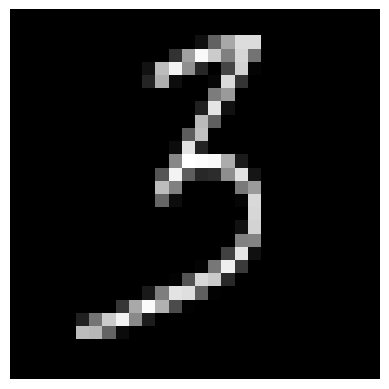

Success: Image 3_4.png is for digit 3 and is recognized as 3.


In [105]:
# Define image paths with correct labels
images_with_labels = [
    ('/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_0/0_4.png', 0),
    ('/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_1/1_2.png', 1),
    ('/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_2/2_2.png', 2),
    ('/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_2/2_0.png', 2),
    ('/Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW5-3/CustomMNISTSamples/Digit_3/3_4.png', 3),
]

# Evaluate each image with success/failure message
for img_path, correct_digit in images_with_labels:
    try:
        predicted_digit = mnist.predict_image(img_path)[0]
        image_filename = img_path.split('/')[-1]  # Extract filename for output
        if predicted_digit == correct_digit:
            print(f"Success: Image {image_filename} is for digit {correct_digit} and is recognized as {predicted_digit}.")
        else:
            print(f"Fail: Image {image_filename} is for digit {correct_digit} but the inference result is {predicted_digit}.")
    except ValueError as e:
        print(f"Error processing {img_path}: {e}")
